In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [147]:
def ticker_to_path(data_path, ticker):
    return data_path + ticker + '.csv'

In [148]:
def get_data(data_path, tickers, date_range):
    df_final = pd.DataFrame(index=date_range)
    if 'SPY' not in tickers:
        tickers.insert(0, 'SPY')
    for ticker in tickers:
        ticker_path = ticker_to_path(data_path, ticker)

        df_temp = pd.read_csv(ticker_path,
                              index_col='Date',
                              parse_dates=True,
                              usecols=['Date', 'Adj Close'],
                              na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': ticker})
        df_final = df_final.join(df_temp)
        if ticker == 'SPY':
            df_final = df_final.dropna(subset=['SPY'])

    return df_final

In [170]:
def pct_daily_returns(data):
#     divide each row by the previous row, skipping the first and last
    return ((data.iloc[1:] / data.iloc[:-1].values) - 1) * 100

In [171]:
data_dir = 'stockdata\\'
tickers = ['AAPL', 'GOOG', 'MSFT']
start_date = '2010-01-01'
end_date = '2021-12-12'
date_range = pd.date_range(start_date, end_date)
final_data = get_data(data_dir, tickers, date_range)

pct_daily_returns(final_data)


,SPY,AAPL,GOOG,MSFT
2010-01-05,0.264712,0.172882,-0.440367,0.032328
2010-01-06,0.070413,-1.590606,-2.520875,-0.613695
2010-01-07,0.422091,-0.184862,-2.327951,-1.039983
2010-01-08,0.332794,0.664826,1.333112,0.689691
2010-01-11,0.139663,-0.882163,-0.151160,-1.272049
...,...,...,...,...
2021-12-06,1.184332,2.150279,0.895311,0.984487
2021-12-07,2.068487,3.544632,2.948613,2.676358
2021-12-08,0.264793,2.278309,0.462046,0.014925
2021-12-09,-0.675156,-0.297009,-0.413184,-0.558257


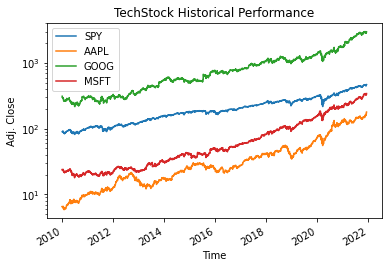

In [151]:
final_data.plot()
plt.title('TechStock Historical Performance')
plt.xlabel('Time')
plt.ylabel('Adj. Close')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

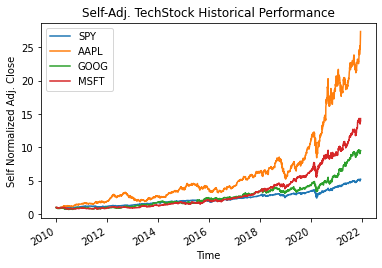

,SPY,AAPL,GOOG,MSFT
2010-01-05,1.002647,1.001729,0.995596,1.000323
2010-01-06,1.003353,0.985795,0.970499,0.994184
2010-01-07,1.007588,0.983973,0.947906,0.983845
2010-01-08,1.010941,0.990515,0.960543,0.990630
2010-01-11,1.012353,0.981777,0.959091,0.978029
...,...,...,...,...
2021-12-06,5.086080,25.228045,9.211678,13.645274
2021-12-07,5.191285,26.122286,9.483295,14.010470
2021-12-08,5.205031,26.717432,9.527112,14.012561
2021-12-09,5.169889,26.638079,9.487748,13.934335


In [152]:
self_adj_data = final_data.iloc[1:] / final_data.iloc[0]
self_adj_data.plot()
plt.title('Self-Adj. TechStock Historical Performance')
plt.xlabel('Time')
plt.ylabel('Self Normalized Adj. Close')
plt.legend(loc='best')
plt.show()
self_adj_data

In [153]:
spy_data = self_adj_data['SPY']
norm_adj_data = self_adj_data.iloc[:,1:].div(spy_data, axis=0)
norm_adj_data

,AAPL,GOOG,MSFT
2010-01-05,0.999084,0.992968,0.997682
2010-01-06,0.982501,0.967255,0.990862
2010-01-07,0.976563,0.940767,0.976436
2010-01-08,0.979794,0.950147,0.979909
2010-01-11,0.969796,0.947387,0.966095
...,...,...,...
2021-12-06,4.960214,1.811155,2.682866
2021-12-07,5.031950,1.826772,2.698844
2021-12-08,5.133001,1.830366,2.692119
2021-12-09,5.152544,1.835194,2.695287


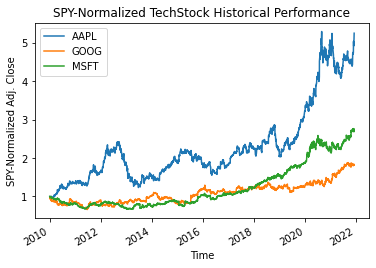

In [154]:
norm_adj_data.plot()
plt.title('SPY-Normalized TechStock Historical Performance')
plt.xlabel('Time')
plt.ylabel('SPY-Normalized Adj. Close')
plt.legend(loc='best')
plt.show()